In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df_movie = pd.read_csv(r"C:\Users\jinan\Downloads\archive (6)\rotten_tomatoes_movies.csv")
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


content Rating Category:['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

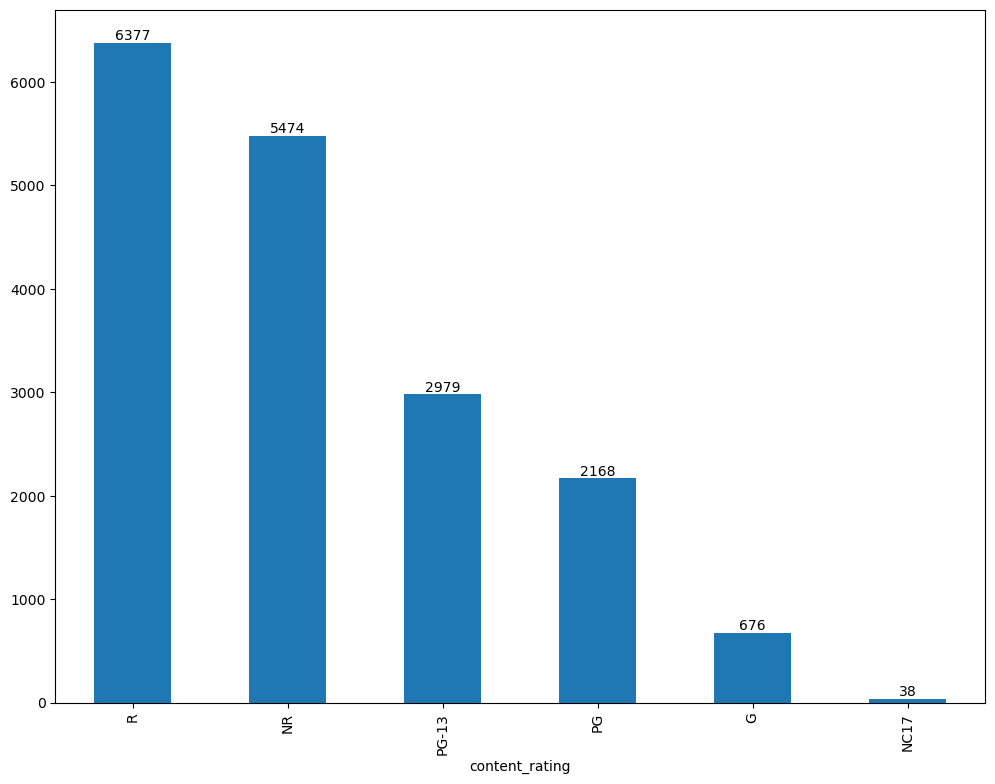

In [5]:
print(f'content Rating Category:{df_movie.content_rating.unique()}')
ax=df_movie.content_rating.value_counts().plot(kind='bar',figsize=(12,9))
ax.bar_label(ax.containers[0])

In [6]:
content_rating= pd.get_dummies(df_movie.content_rating, dtype=int)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


Audience status Category:['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

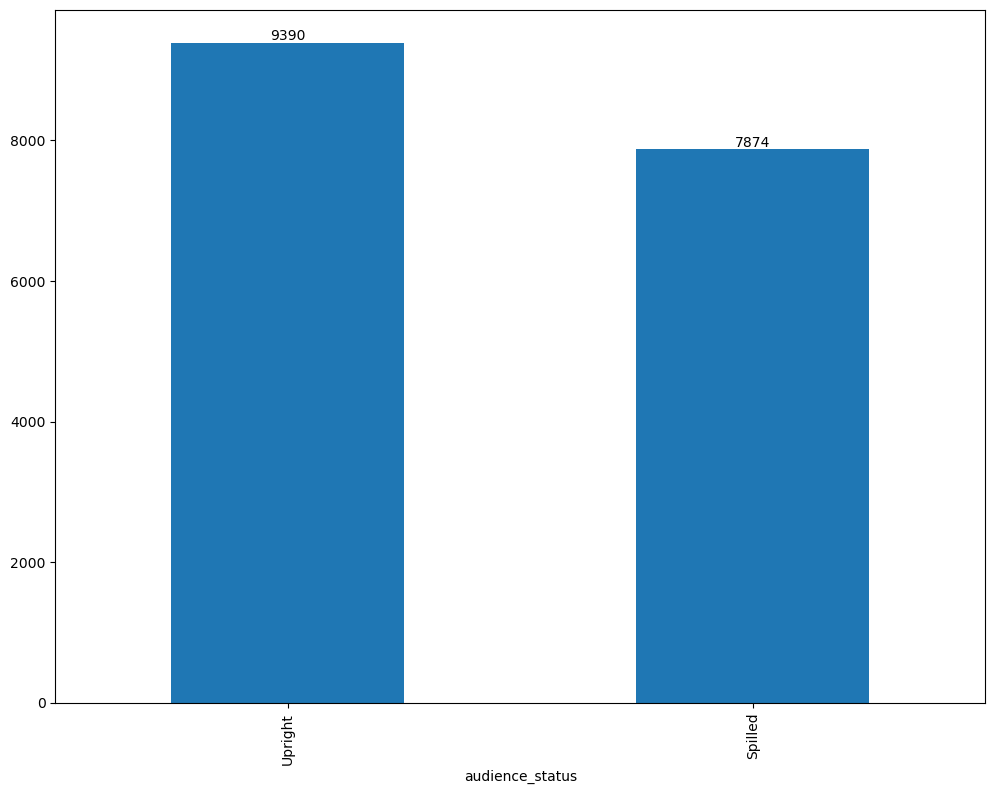

In [7]:
print(f'Audience status Category:{df_movie.audience_status.unique()}')
ax=df_movie.audience_status.value_counts().plot(kind='bar',figsize=(12,9))
ax.bar_label(ax.containers[0])

In [8]:
audience_status = pd.DataFrame(df_movie.audience_status.replace(['Spilled', 'Upright'],[0,1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [9]:
tomatometer_status= pd.DataFrame(df_movie.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


In [10]:
df_feature=pd.concat([df_movie[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating','audience_count', 'tomatometer_rotten_critics_count','tomatometer_top_critics_count','tomatometer_fresh_critics_count']], content_rating, audience_status, tomatometer_status],axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_rotten_critics_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,76,43,73,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,19,44,123,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,8,2,16,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,0,6,54,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,3,5,24,1,0,0,0,0,0,1.0,1.0


In [11]:
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_rotten_critics_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,20.871188,14.765999,36.237292,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,29.978900,15.172256,51.362454,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,8.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,24.000000,23.000000,44.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,303.000000,69.000000,497.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [12]:
len(df_feature)

17017

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

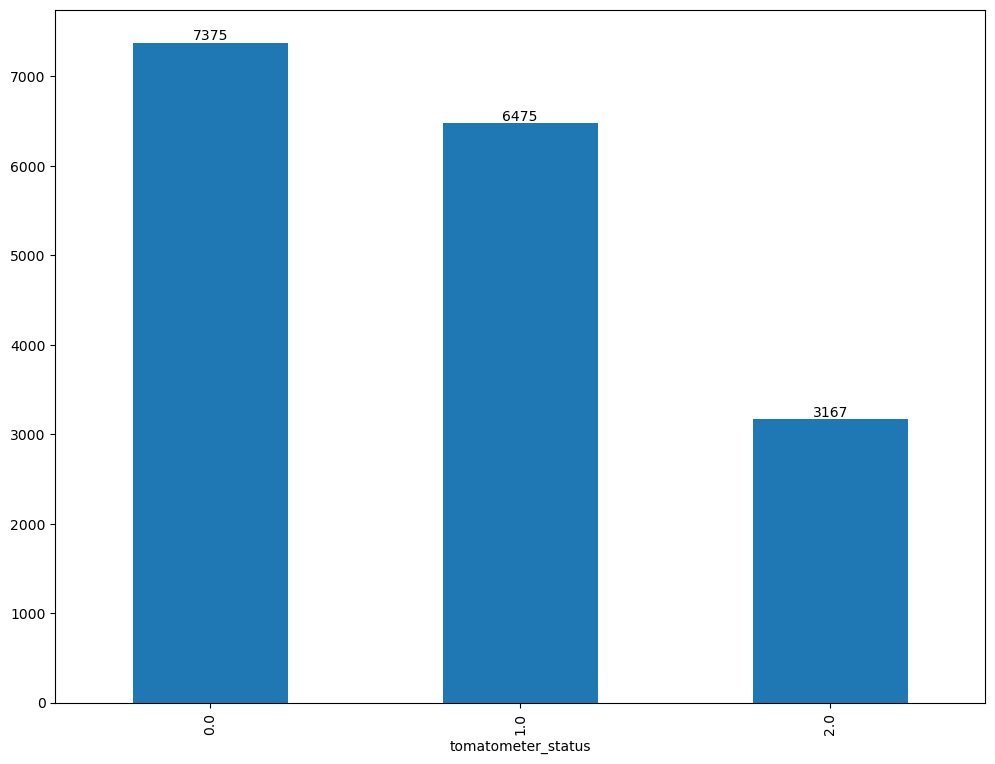

In [13]:
ax= df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1),df_feature.tomatometer_status, test_size=0.2, random_state=42)
print(f'size of training data is {len(x_train)} and the size of test data is { len (x_test)}')

size of training data is 13613 and the size of test data is 3404


In [15]:
tree_3_leaf= DecisionTreeClassifier(max_leaf_nodes = 3, random_state=2)

In [16]:
tree_3_leaf.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [17]:
y_predict = tree_3_leaf.predict(x_test)

In [18]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9462397179788484
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



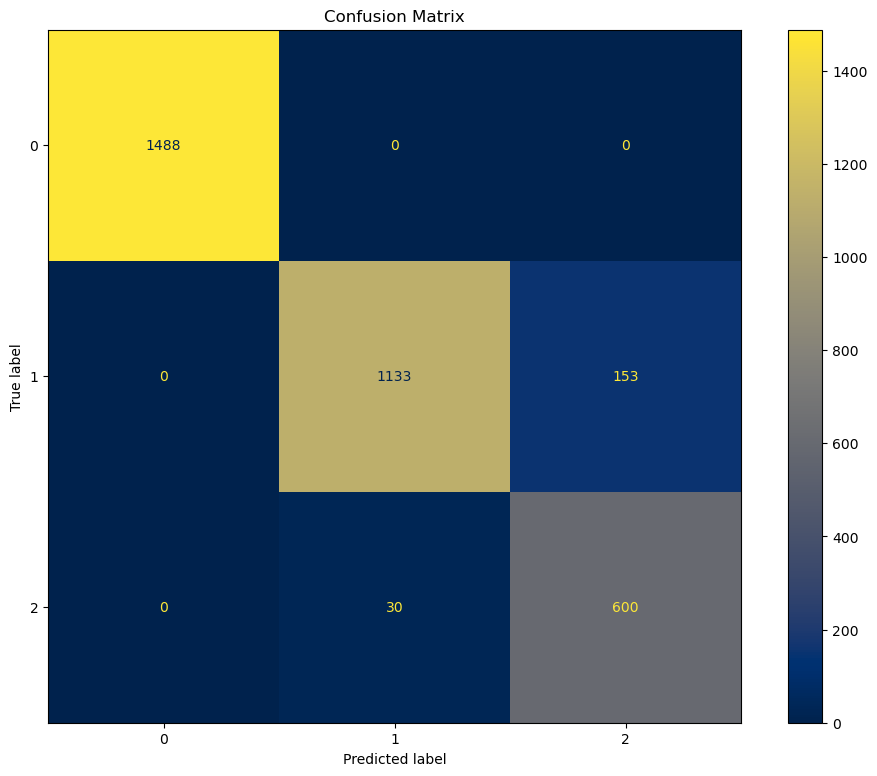

In [19]:
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, y_predict)
y_predict = tree_3_leaf.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

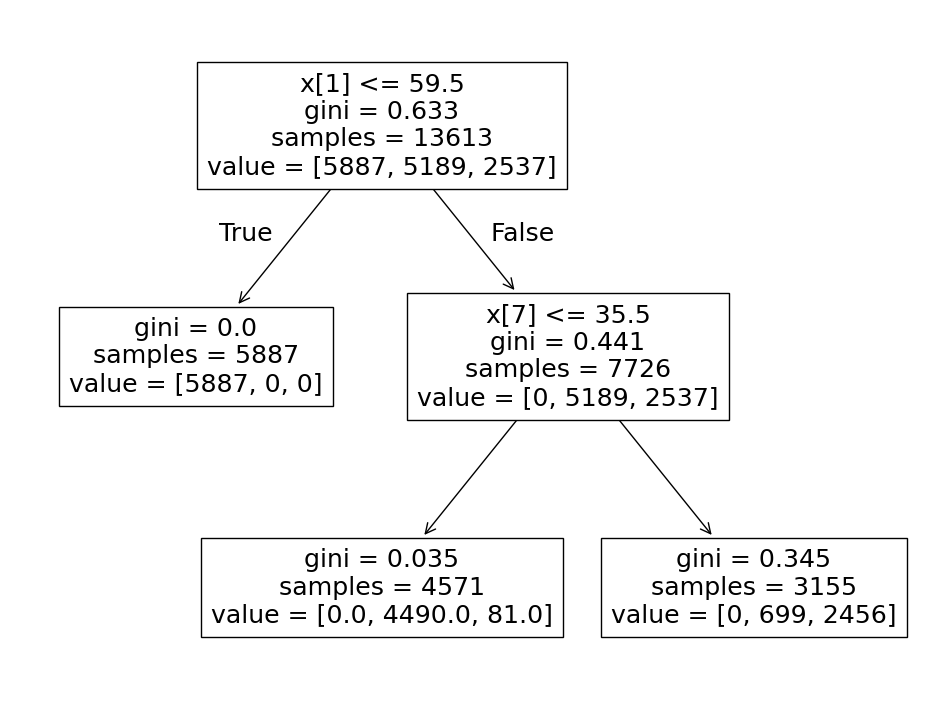

In [20]:
fig, ax =plt.subplots(figsize=(12,9))
plot_tree(tree_3_leaf, ax=ax)
plt.show()

0.9905992949471211
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



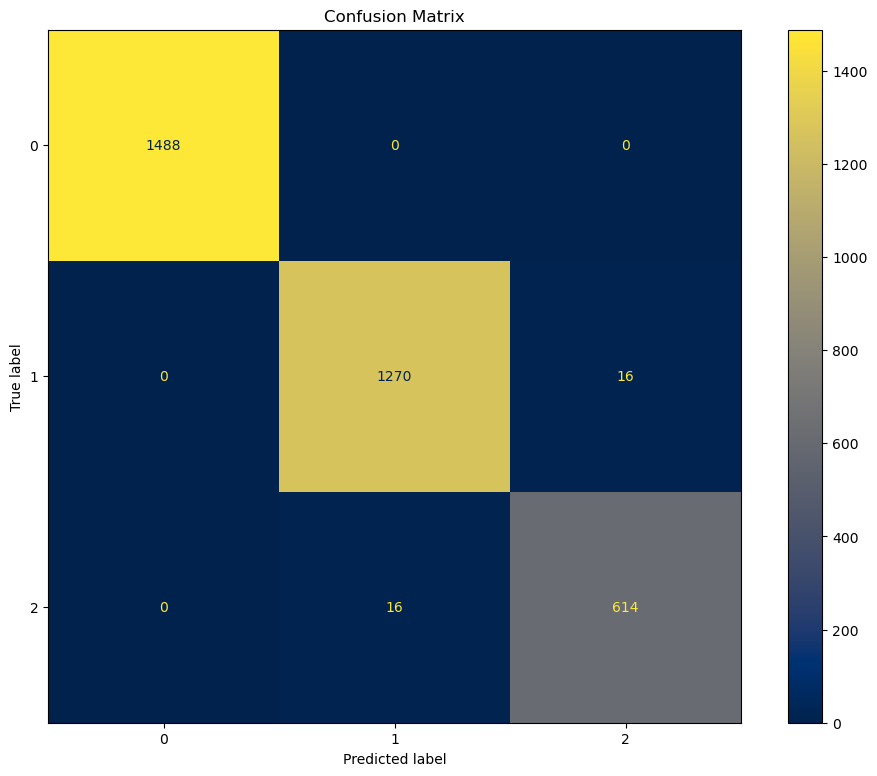

In [21]:
tree= DecisionTreeClassifier(random_state=2)
tree.fit(x_train,y_train)
y_predict = tree.predict(x_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, y_predict)
y_predict = tree.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

0.9914806110458284
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



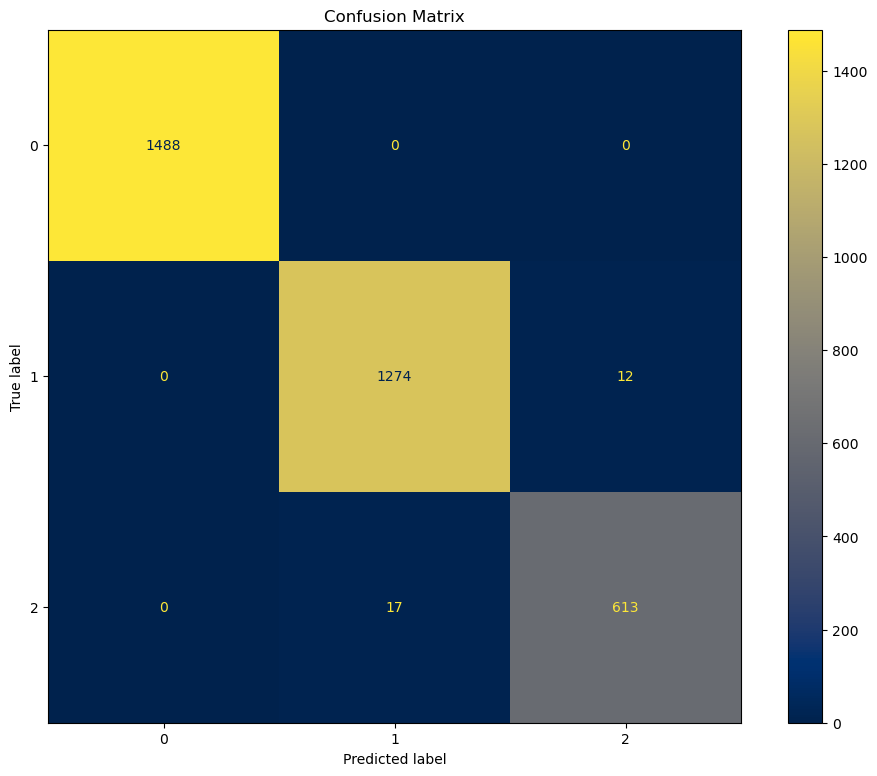

In [22]:
rf= RandomForestClassifier(random_state=2)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, y_predict)
y_predict = rf.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

0.005786107494664292
0.5022137600681551
0.09717176136912213
0.0519642755732833
0.013171145943517329
0.11445805245349072
0.035947924342115335
0.14318028565637678
0.0003177606453389959
1.2611030064884742e-05
0.007231372528413623
0.0005697534580207679
0.0029724160379103154
0.0018732139442984566
0.023129559455228065


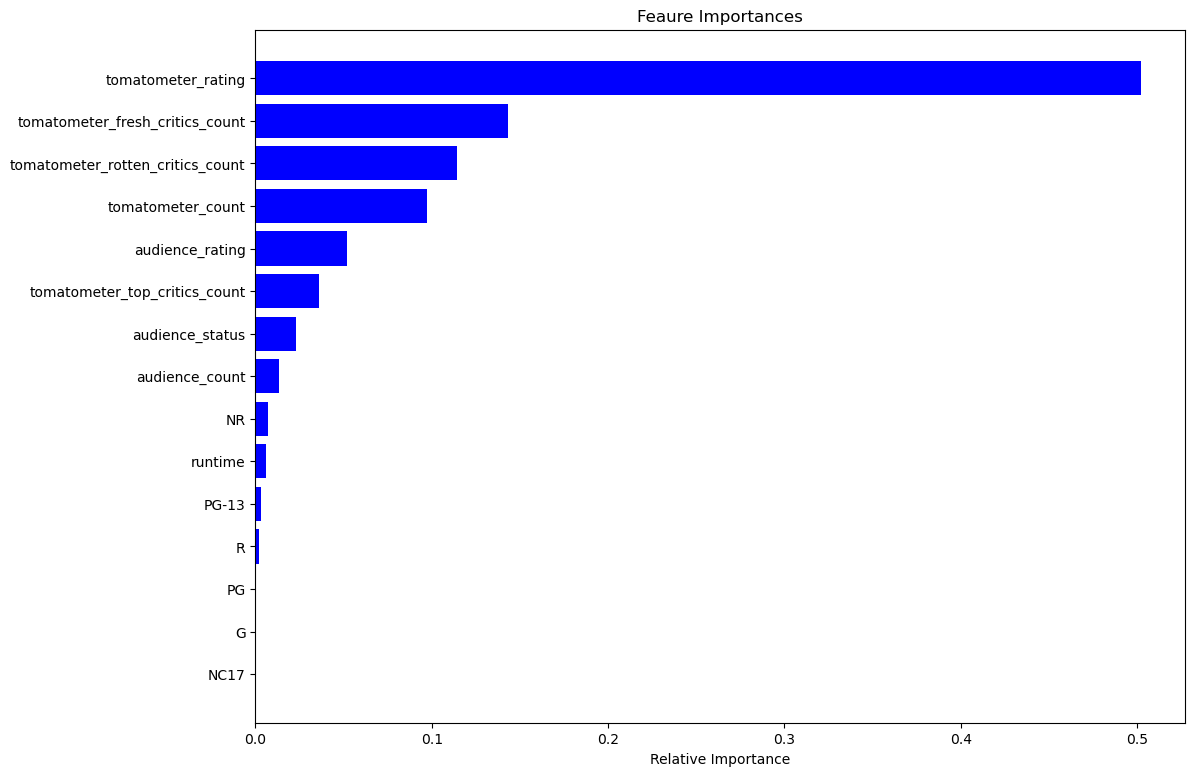

In [23]:
feature_importance= rf.feature_importances_
for i, feature in enumerate(x_train.columns):
    print(f'{feature_importance[i]}')
indices = np.argsort(feature_importance)
plt.figure(figsize=(12,9))
plt.title('Feaure Importances')
plt.barh(range(len(indices)), feature_importance[indices], color ='b' , align = 'center')
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [24]:
x_train, x_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG', 'G', 'NC17'], axis=1),df_feature.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(x_train)} and the size of test data is { len(x_test)}')

Size of training data is 13613 and the size of test data is 3404


0.9920681551116334
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



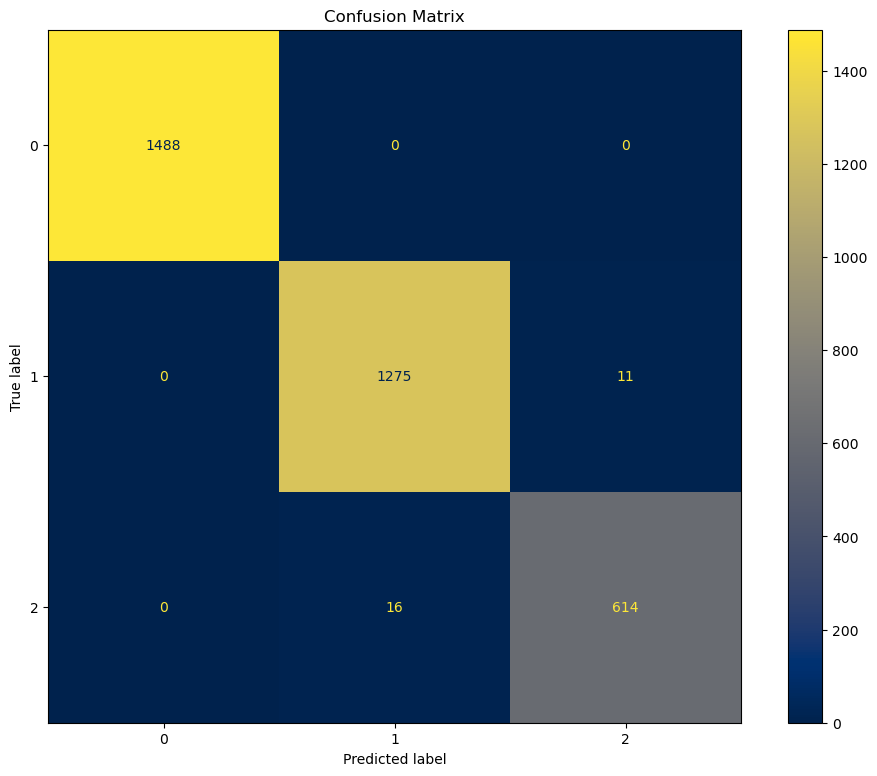

In [25]:
rf= RandomForestClassifier(random_state=2)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, y_predict)
y_predict = rf.predict(x_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

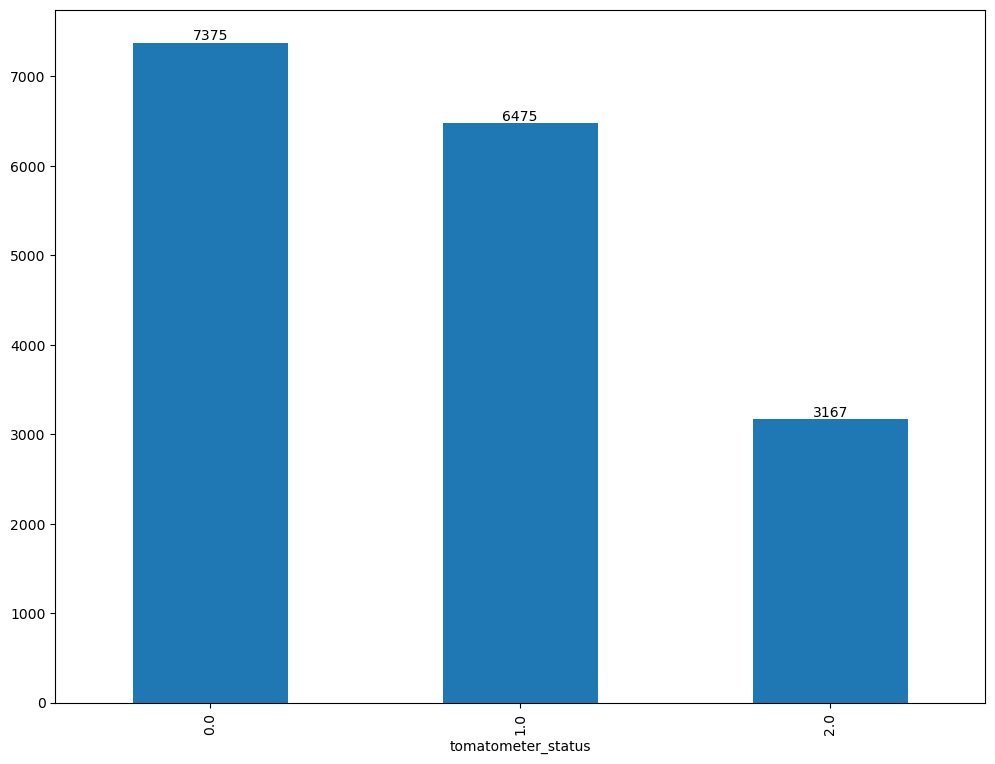

In [26]:
ax= df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [27]:
class_weight= compute_class_weight(class_weight='balanced', classes= np.unique(df_feature.tomatometer_status),
                                   y=df_feature.tomatometer_status.values)
class_weight_dict= dict(zip(range(len(class_weight.tolist())),class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

0.9929494712103408
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



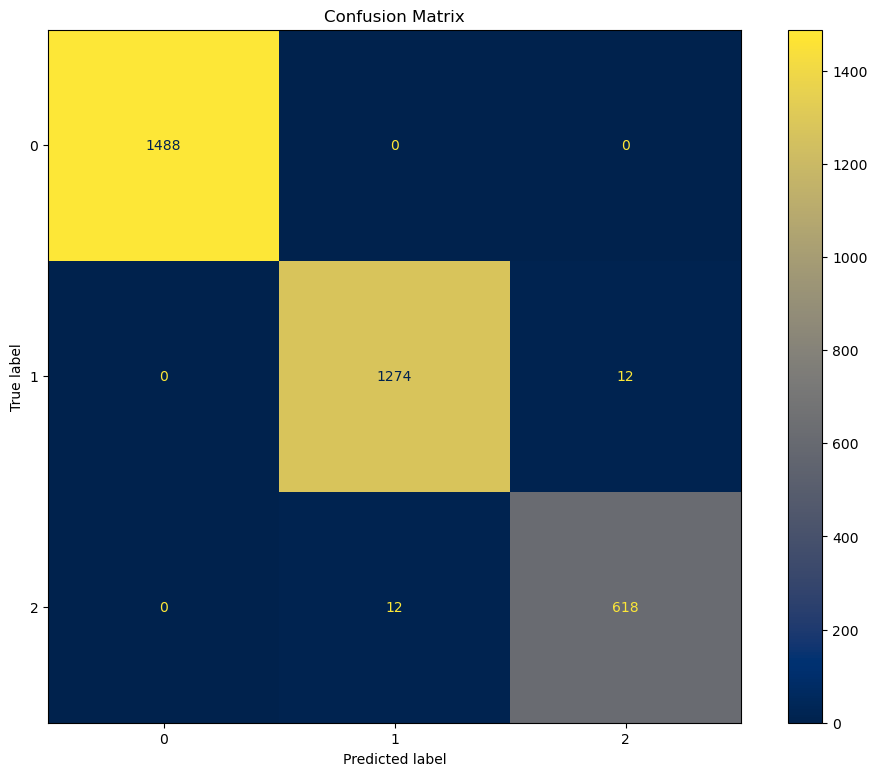

In [28]:
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(x_train, y_train)
y_predict = rf_weighted.predict(x_test)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [29]:
df_movie = pd.read_csv(r"C:\Users\jinan\Downloads\archive (6)\rotten_tomatoes_movies.csv")
df_critics = pd.read_csv(r"C:\Users\jinan\Downloads\archive (6)\rotten_tomatoes_critic_reviews.csv")
df_critics.head()


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [30]:
df_merged= df_critics.merge(df_movie, how='inner', on=['rotten_tomatoes_link'])
df_merged= df_merged[['rotten_tomatoes_link','movie_title', 'review_content', 'review_type', 'tomatometer_status']]
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


[Text(0, 0, '680954'), Text(0, 0, '383155')]

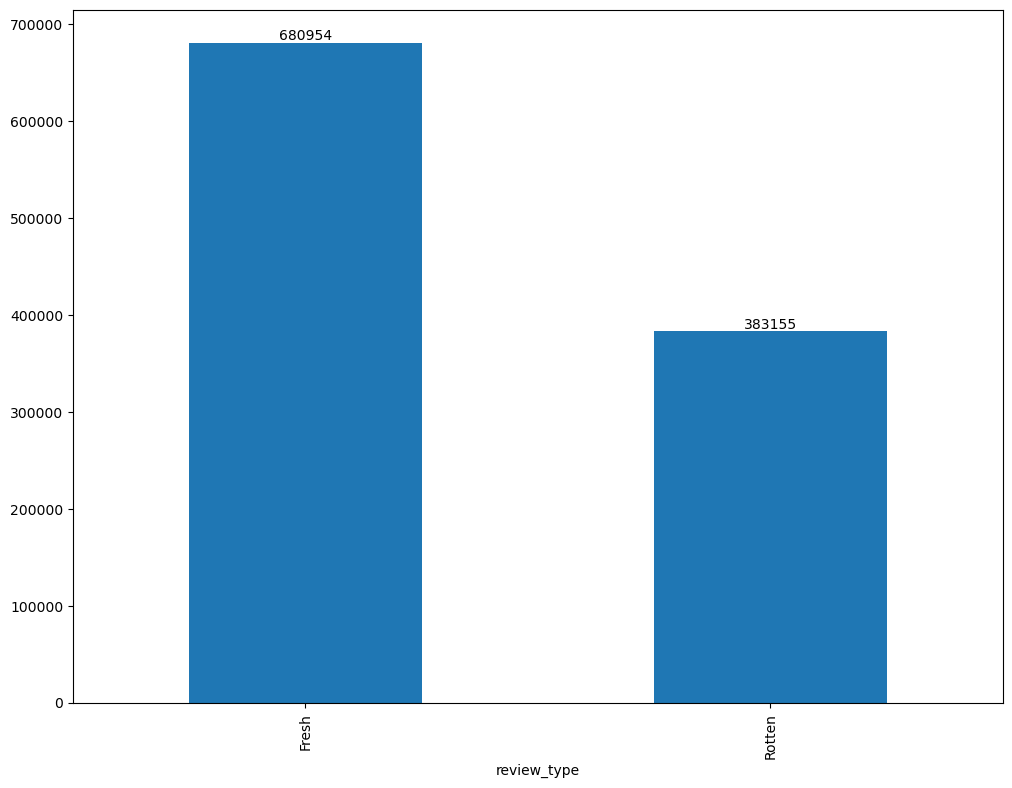

In [31]:
#filiter_mising_values_on_review_content
df_merged= df_merged.dropna(subset=['review_content'])
ax= df_merged.review_type.value_counts().plot(kind='bar',figsize=(12,9))
ax.bar_label(ax.containers[0])

In [32]:
df_sub = df_merged[0:5000]
review_type= pd.DataFrame(df_sub.review_type.replace(['Rotten', 'Fresh'],[0,1]))
df_feature_critics = pd.concat([df_sub[['review_content']]
                                ,review_type],axis=1).dropna()
df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


In [33]:
 X_train, X_test, y_train, y_test = train_test_split(df_feature_critics['review_content'],df_feature_critics['review_type'], test_size=0.2,random_state=42)


              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



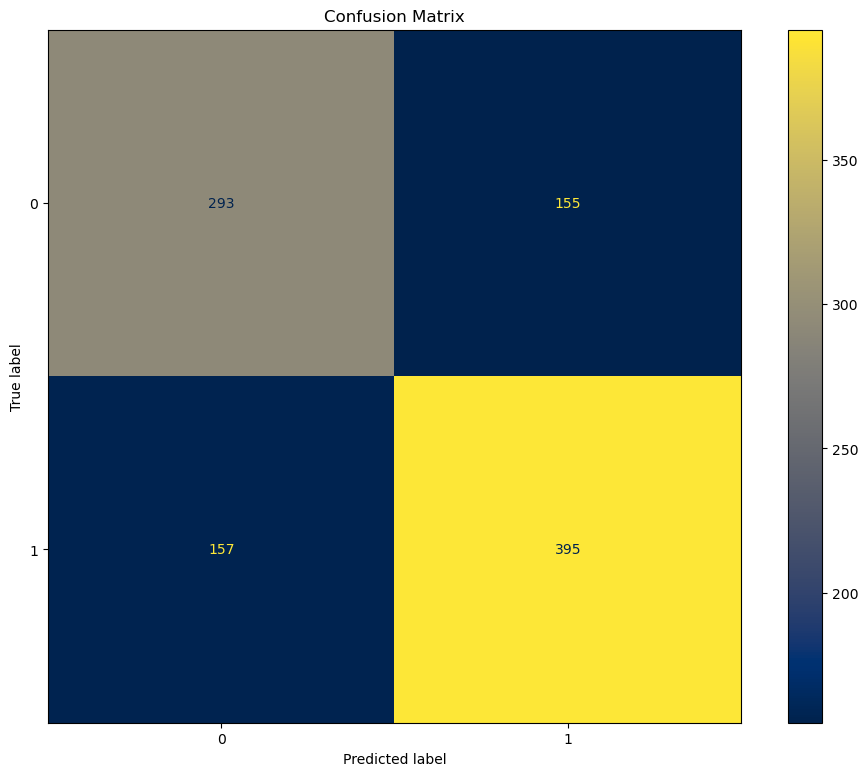

In [34]:
vectorizer= CountVectorizer(min_df=1)
X_train_vec=vectorizer.fit_transform(X_train).toarray()
rf=RandomForestClassifier(random_state=2)
rf.fit(X_train_vec,y_train)
y_predicted=rf.predict(vectorizer.transform(X_test).toarray())
print(classification_report(y_test,y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
X_test_vec = vectorizer.transform(X_test).toarray()
ConfusionMatrixDisplay.from_estimator(rf, X_test_vec, y_test, cmap='cividis', ax=ax)

plt.title('Confusion Matrix')
plt.show()

In [35]:
class_weight = compute_class_weight(class_weight='balanced', classes= np.unique(df_feature_critics.review_type),
                                    y= df_feature_critics.review_type.values)
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict 

{0: 1.058425063505504, 1: 0.9476876421531463}

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       448
           1       0.74      0.67      0.70       552

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000



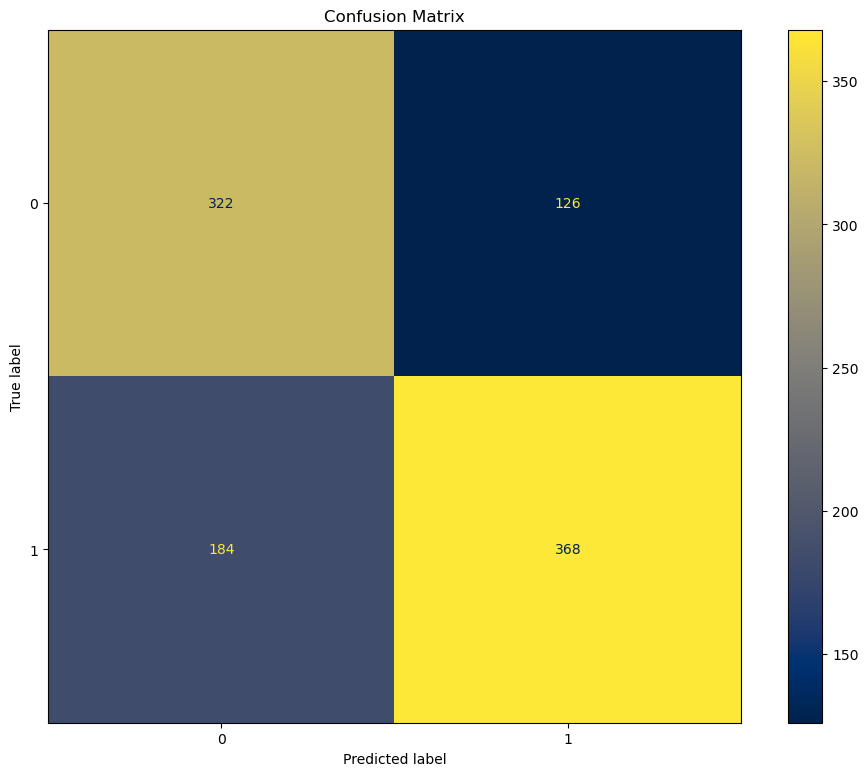

In [36]:
vectorizer= CountVectorizer(min_df=1)
X_train_vec=vectorizer.fit_transform(X_train).toarray()
rf_weighted=RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train_vec,y_train)
y_predicted=rf_weighted.predict(vectorizer.transform(X_test).toarray())
print(classification_report(y_test,y_predicted))

fig, ax = plt.subplots(figsize=(12, 9))
X_test_vec = vectorizer.transform(X_test).toarray()
ConfusionMatrixDisplay.from_estimator(rf_weighted, X_test_vec, y_test, cmap='cividis', ax=ax)

plt.title('Confusion Matrix')
plt.show()

In [37]:
def predict_movie_status(predication):
    positive_percentage = (predication == 1).sum()/len(predication)*100
    predication = 'Fresh' if positive_percentage >=60 else 'Rotten'
    print(f'Positive Review: {positive_percentage: .2f}%')
    print(f'Movie status: {predication}')

In [38]:
df_bol = df_merged.loc[df_merged['movie_title'] == 'Body of Lies']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


In [39]:
y_predicated_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicated_bol)

Positive Review:  50.49%
Movie status: Rotten


In [40]:
df_merged[ 'tomatometer_status'].loc[df_merged['movie_title']== 'Body of Lies'].unique()

array(['Rotten'], dtype=object)

In [41]:
df_bol = df_merged.loc[df_merged['movie_title'] == 'Angel Heart']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
9240,m/1000959-angel_heart,Angel Heart,"Angel Heart is a thriller and a horror movie, ...",Fresh,Fresh
9245,m/1000959-angel_heart,Angel Heart,Alan Parker's pulp sensibilities are beautiful...,Fresh,Fresh
9246,m/1000959-angel_heart,Angel Heart,One of the few truly great modern horror films,Fresh,Fresh
9248,m/1000959-angel_heart,Angel Heart,"Erotic, twisty and incredibly disturbed. Splen...",Fresh,Fresh
9249,m/1000959-angel_heart,Angel Heart,Este excepcional noir conta com maravilhosa fo...,Fresh,Fresh


In [42]:
y_predicated_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicated_bol)

Positive Review:  61.11%
Movie status: Fresh


In [43]:
df_merged[ 'tomatometer_status'].loc[df_merged['movie_title']== 'Angel Heart'].unique()

array(['Fresh'], dtype=object)

In [44]:
df_bol = df_merged.loc[df_merged['movie_title'] == 'The Duchess']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
8558,m/10009493-duchess,The Duchess,For all its luscious period trappings and Keir...,Rotten,Fresh
8559,m/10009493-duchess,The Duchess,Solid but distant melodrama about the flamboya...,Fresh,Fresh
8560,m/10009493-duchess,The Duchess,"It could have been an intriguing, poignant sag...",Rotten,Fresh
8561,m/10009493-duchess,The Duchess,Has riveting parallels with much more recent B...,Fresh,Fresh
8562,m/10009493-duchess,The Duchess,Ralph Fiennes steals it as the dour duke in a ...,Fresh,Fresh


In [45]:
y_predicated_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())
predict_movie_status(y_predicated_bol)

Positive Review:  60.12%
Movie status: Fresh


In [46]:
df_merged[ 'tomatometer_status'].loc[df_merged['movie_title']== 'The Duchess'].unique()

array(['Fresh'], dtype=object)